# Predicting Stock Prices Using Machine Learning

Article: https://neptune.ai/blog/predicting-stock-prices-using-machine-learning

Code: https://github.com/YiLi225/NeptuneBlogs/blob/main/Predicting_StockPrices.py

**Data sources**

Alpha Vantage: https://www.alphavantage.co/

(unofficial pip package) https://github.com/RomelTorres/alpha_vantage

yfinance: https://github.com/ranaroussi/yfinance

## Access Data

In [11]:
import config 
import os
# os.environ['NEPTUNE_API_TOKEN'] = config.neptune_token
os.environ['ALPHAVANTAGE_API_KEY'] = config.alphavantage_key

In [8]:
# stock ticker symbol
ticker = 'MSFT' 

# JSON file with all the stock prices data 
url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

In [5]:
import pandas as pd
import urllib, json, datetime
### get the low, high, close, and open prices 
with urllib.request.urlopen(url_string) as url:
    data = json.loads(url.read().decode())
    # pull stock market data
    data = data['Time Series (Daily)']
    df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
    for key,val in data.items():
        date = datetime.datetime.strptime(key, '%Y-%m-%d')
        data_row = [date.date(),float(val['3. low']),float(val['2. high']),
                    float(val['4. close']),float(val['1. open'])]
        df.loc[-1,:] = data_row
        df.index = df.index + 1
df

,Date,Low,High,Close,Open
5574,2021-12-27,335.43,342.48,342.45,335.46
5573,2021-12-23,332.73,336.39,334.69,332.75
5572,2021-12-22,325.75,333.605,333.2,328.3
5571,2021-12-21,319.8,327.73,327.29,323.29
5570,2021-12-20,317.57,322.8,319.91,320.05
...,...,...,...,...,...
4,1999-11-05,90.5,92.87,91.56,91.81
3,1999-11-04,90.31,92.75,91.75,92.31
2,1999-11-03,91.5,93.5,92.0,92.94
1,1999-11-02,91.94,94.5,92.56,92.75


In [6]:
# Save data to this file
fileName = 'stock_market_data-%s.csv'%ticker
df.to_csv("data/"+fileName)

In [7]:
# Sort DataFrame by date
stockprices = df.sort_values('Date')
stockprices

,Date,Low,High,Close,Open
0,1999-11-01,92.12,94.19,92.37,93.25
1,1999-11-02,91.94,94.5,92.56,92.75
2,1999-11-03,91.5,93.5,92.0,92.94
3,1999-11-04,90.31,92.75,91.75,92.31
4,1999-11-05,90.5,92.87,91.56,91.81
...,...,...,...,...,...
5570,2021-12-20,317.57,322.8,319.91,320.05
5571,2021-12-21,319.8,327.73,327.29,323.29
5572,2021-12-22,325.75,333.605,333.2,328.3
5573,2021-12-23,332.73,336.39,334.69,332.75


In [13]:
import pandas_datareader as pdr
df = pdr.DataReader(ticker, data_source="av-daily", start="2024-01-01", end="2024-01-31")
df

,open,high,low,close,volume
2024-01-02,373.860,375.9000,366.7710,370.87,25258633
2024-01-03,369.010,373.2562,368.5100,370.60,23083465
2024-01-04,370.665,373.1000,367.1700,367.94,20901502
2024-01-05,368.970,372.0600,366.5000,367.75,20074451
2024-01-08,369.300,375.2000,369.0100,374.69,23133967
2024-01-09,372.010,375.9900,371.1900,375.79,20829953
2024-01-10,376.370,384.1700,376.3200,382.77,25514245
2024-01-11,386.000,390.6800,380.3800,384.63,27850846
2024-01-12,385.490,388.6800,384.6500,388.47,21661153
2024-01-16,393.660,394.0300,387.6229,390.27,27202268


### yfinance

In [24]:
import pandas as pd
df = pd.read_csv('portfolio.csv')
df.iloc[0]['ticker']

'AIQUY'

In [15]:
import yfinance as yf
stock = yf.Ticker('MSFT')
stock.history(period="1wk")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-05 00:00:00-05:00,409.899994,411.160004,403.989990,405.649994,25352300,0.0,0.0
2024-02-06 00:00:00-05:00,405.880005,407.970001,402.910004,405.489990,18382600,0.0,0.0
2024-02-07 00:00:00-05:00,407.440002,414.299988,407.399994,414.049988,22340500,0.0,0.0
2024-02-08 00:00:00-05:00,414.049988,415.559998,412.529999,414.109985,21225300,0.0,0.0
2024-02-09 00:00:00-05:00,415.250000,420.820007,415.089996,420.549988,22012900,0.0,0.0


In [18]:
#  get last price
stock.info['previousClose']

414.11

In [3]:
import yfinance as yf
import datetime
ticker = 'MSFT'
start_date = datetime.datetime(2024, 1, 1)
end_date = datetime.datetime(2024, 2, 1)
df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,373.859985,375.899994,366.769989,370.869995,370.869995,25258600
2024-01-03,369.010010,373.260010,368.510010,370.600006,370.600006,23083500
2024-01-04,370.670013,373.100006,367.170013,367.940002,367.940002,20901500
2024-01-05,368.970001,372.059998,366.500000,367.750000,367.750000,20987000
2024-01-08,369.299988,375.200012,369.010010,374.690002,374.690002,23134000
2024-01-09,372.010010,375.989990,371.190002,375.790009,375.790009,20830000
2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200
2024-01-11,386.000000,390.679993,380.380005,384.630005,384.630005,27850800
2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700


In [5]:
df.index

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-22', '2024-01-23', '2024-01-24',
               '2024-01-25', '2024-01-26', '2024-01-29', '2024-01-30',
               '2024-01-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

## Helper Functions

In [13]:

#### Define helper functions to calculate the metrics RMSE and MAPE ####
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)  
    """
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))                   
    return rmse

### The effectiveness of prediction method is measured in terms of the Mean Absolute Percentage Error (MAPE) and RMSE
def calculate_mape(y_true, y_pred): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)    
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100    
    return mape

## Split the time-series data into training seq X and output value Y
def extract_seqX_outcomeY(data, N, offset):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset 
        N - window size, e.g., 60 for 60 days 
        offset - position to start the split
    """
    X, y = [], []
    
    for i in range(offset, len(data)):
        X.append(data[i-N:i])
        y.append(data[i])
    
    return np.array(X), np.array(y)


### For medium-term trading 
def plot_stock_trend(var, cur_title, stockprices=stockprices, logNeptune=True, logmodelName='Simple MA'):
    ax = stockprices[['Close', var,'200day']].plot(figsize=(20, 10))
    plt.grid(False)
    plt.title(cur_title)
    plt.axis('tight')
    plt.ylabel('Stock Price ($)')
    
    ## Log images to Neptune new version 
    if logNeptune:
        npt_exp[f'Plot of Stock Predictions with {logmodelName}'].upload(neptune.types.File.as_image(ax.get_figure()))

def calculate_perf_metrics(var, logNeptune=True, logmodelName='Simple MA'):
    ### RMSE 
    rmse = calculate_rmse(np.array(stockprices[train_size:]['Close']), np.array(stockprices[train_size:][var]))
    ### MAPE 
    mape = calculate_mape(np.array(stockprices[train_size:]['Close']), np.array(stockprices[train_size:][var]))
    
    ## Log images to Neptune new version 
    if logNeptune:        
        npt_exp['RMSE'].log(rmse)
        npt_exp['MAPE (%)'].log(mape)
    
    return rmse, mape


In [9]:

#### Train-Test split for time-series ####
test_ratio = 0.2
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(stockprices))
test_size = int(test_ratio * len(stockprices))

print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

train = stockprices[:train_size][['Date', 'Close']]
test = stockprices[train_size:][['Date', 'Close']]

train_size: 4460
test_size: 1115


In [10]:

###================= simple MA
stockprices = stockprices.set_index('Date')
stockprices

,Low,High,Close,Open
Date,,,,
1999-11-01,92.12,94.19,92.37,93.25
1999-11-02,91.94,94.5,92.56,92.75
1999-11-03,91.5,93.5,92.0,92.94
1999-11-04,90.31,92.75,91.75,92.31
1999-11-05,90.5,92.87,91.56,91.81
...,...,...,...,...
2021-12-20,317.57,322.8,319.91,320.05
2021-12-21,319.8,327.73,327.29,323.29
2021-12-22,325.75,333.605,333.2,328.3


## Simple Moving Average

https://app.neptune.ai/slevin48/stockprices/e/STOC-16
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 17 operations to synchronize with Neptune. Do not kill this process.


All 17 operations synced, thanks for waiting!


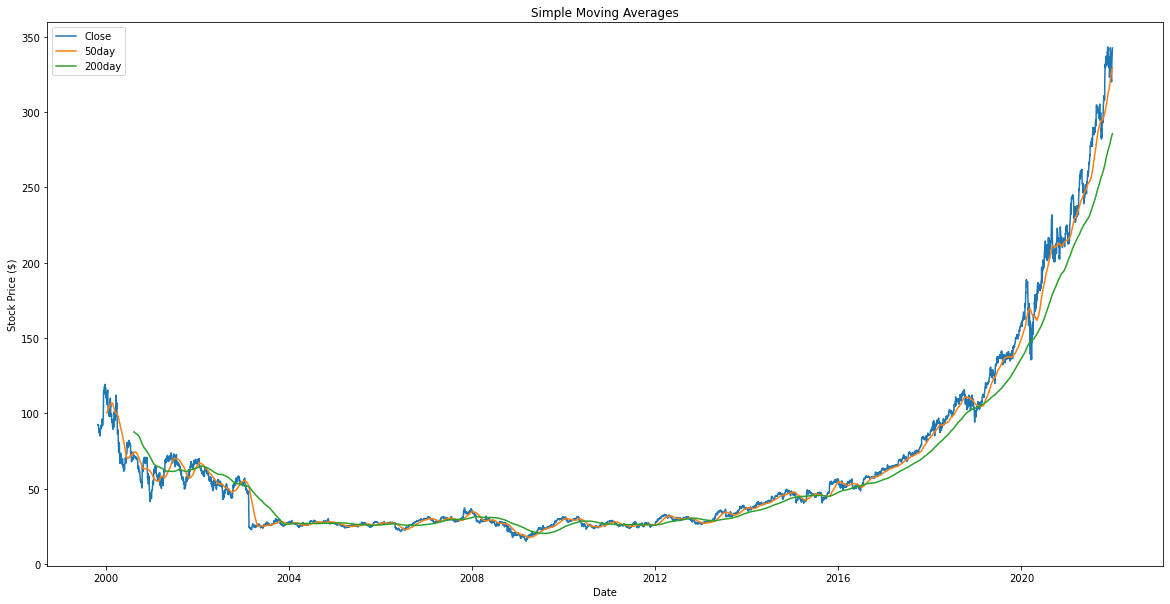

In [14]:
window_size = 50

###### Create Neptune project 
## update: pip install neptune-client
import neptune.new as neptune
import os

# Create an experiment and log the model in Neptune new version
npt_exp = neptune.init(api_token=os.getenv('NEPTUNE_API_TOKEN'),
                       project='slevin48/stockprices', 
                       name='SMA', 
                        description='stock-prediction-machine-learning', 
                        tags=[ticker,'stockprediction', 'MA_Simple', 'neptune'])


window_var = str(window_size) + 'day'
    
stockprices[window_var] = stockprices['Close'].rolling(window_size).mean()
### Include a 200-day SMA for reference 
stockprices['200day'] = stockprices['Close'].rolling(200).mean()
    
### Plot and performance metrics for SMA model
plot_stock_trend(var=window_var,stockprices=stockprices, cur_title='Simple Moving Averages', logmodelName='Simple MA')
rmse_sma, mape_sma = calculate_perf_metrics(var=window_var, logmodelName='Simple MA')

### Stop the run after logging for new version
npt_exp.stop()

## Exponential Moving Average

https://app.neptune.ai/slevin48/stockprices/e/STOC-17
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 17 operations to synchronize with Neptune. Do not kill this process.


All 17 operations synced, thanks for waiting!


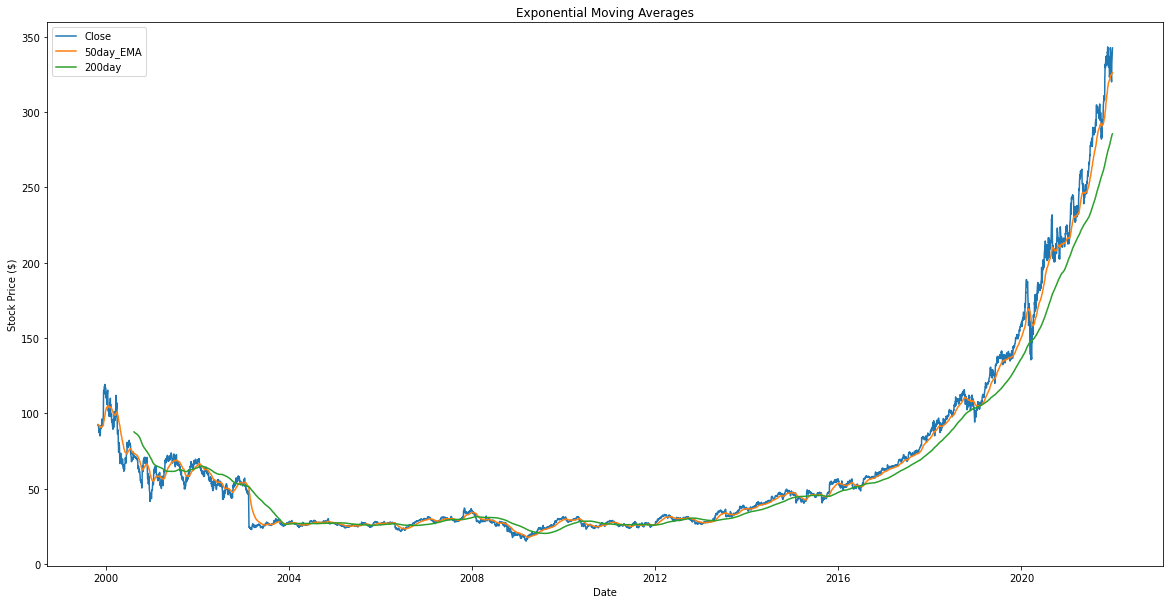

In [15]:
# Create an experiment and log the model in Neptune new version
npt_exp = neptune.init(    
        api_token=os.getenv('NEPTUNE_API_TOKEN'),
        project='slevin48/stockprices', 
        name='EMA', 
        description='stock-prediction-machine-learning', 
        tags=[ticker,'stockprediction', 'MA_Exponential', 'neptune'])      
    
###### Exponential MA
window_ema_var = window_var+'_EMA'
# Calculate the 50-day exponentially weighted moving average
stockprices[window_ema_var] = stockprices['Close'].ewm(span=window_size, adjust=False).mean()
stockprices['200day'] = stockprices['Close'].rolling(200).mean()
    
### Plot and performance metrics for EMA model
plot_stock_trend(var=window_ema_var, stockprices=stockprices, cur_title='Exponential Moving Averages', logmodelName='Exp MA')
rmse_ema, mape_ema = calculate_perf_metrics(var=window_ema_var, logmodelName='Exp MA')
### Stop the run after logging for new version
npt_exp.stop()

## Predicting stock prices with an LSTM model

In [16]:
layer_units, optimizer = 50, 'adam' 
cur_epochs = 15
cur_batch_size = 20

cur_LSTM_pars = {'units': layer_units, 
                    'optimizer': optimizer, 
                    'batch_size': cur_batch_size, 
                    'epochs': cur_epochs
                    }

  
# Create an experiment and log the model in Neptune new version
npt_exp = neptune.init(    
        api_token=os.getenv('NEPTUNE_API_TOKEN'),
        project='slevin48/stockprices', 
        name='LSTM',         
        description='stock-prediction-machine-learning', 
        tags=[ticker,'stockprediction', 'LSTM','neptune'])   
npt_exp['LSTMPars'] = cur_LSTM_pars

https://app.neptune.ai/slevin48/stockprices/e/STOC-18
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [17]:
# scale our dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stockprices[['Close']])
scaled_data_train = scaled_data[:train.shape[0]]
    
# We use past 50 days’ stock prices for our training to predict the 51th day's closing price.
X_train, y_train = extract_seqX_outcomeY(scaled_data_train, window_size, window_size)


In [18]:
### Build a LSTM model and log model summary to Neptune ###    
def Run_LSTM(X_train, layer_units=50, logNeptune=True, NeptuneProject=None):     
    inp = Input(shape=(X_train.shape[1], 1))
    
    x = LSTM(units=layer_units, return_sequences=True)(inp)
    x = LSTM(units=layer_units)(x)
    out = Dense(1, activation='linear')(x)
    model = Model(inp, out)
    
    # Compile the LSTM neural net
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    ## !!! log to Neptune, e.g., set NeptuneProject = npt_exp (new version)
    if logNeptune:
       model.summary(print_fn=lambda x: NeptuneProject['model_summary'].log(x))
        
    return model   

model = Run_LSTM(X_train, layer_units=layer_units, logNeptune=True, NeptuneProject=npt_exp)

history = model.fit(X_train, y_train, epochs=cur_epochs, batch_size=cur_batch_size, 
                    verbose=1, validation_split=0.1, shuffle=True)

Epoch 1/15
199/199 [==============================] - 16s 57ms/step - loss: 0.0065 - val_loss: 6.1708e-04
Epoch 2/15
199/199 [==============================] - 9s 44ms/step - loss: 0.0012 - val_loss: 5.2217e-04
Epoch 3/15
199/199 [==============================] - 9s 43ms/step - loss: 0.0010 - val_loss: 4.6767e-04
Epoch 4/15
199/199 [==============================] - 8s 40ms/step - loss: 9.0956e-04 - val_loss: 4.8231e-04
Epoch 5/15
199/199 [==============================] - 9s 44ms/step - loss: 8.1421e-04 - val_loss: 5.7099e-04
Epoch 6/15
199/199 [==============================] - 8s 43ms/step - loss: 7.4754e-04 - val_loss: 3.7615e-04
Epoch 7/15
199/199 [==============================] - 8s 40ms/step - loss: 7.0965e-04 - val_loss: 3.4012e-04
Epoch 8/15
199/199 [==============================] - 8s 39ms/step - loss: 6.6592e-04 - val_loss: 3.2822e-04
Epoch 9/15
199/199 [==============================] - 8s 38ms/step - loss: 6.4016e-04 - val_loss: 3.1919e-04
Epoch 10/15
199/199 [=========

In [19]:
# predict stock prices using past window_size stock prices
def preprocess_testdat(data=stockprices, scaler=scaler, window_size=window_size, test=test):    
    raw = data['Close'][len(data) - len(test) - window_size:].values
    raw = raw.reshape(-1,1)
    raw = scaler.transform(raw)
    
    X_test = []
    for i in range(window_size, raw.shape[0]):
        X_test.append(raw[i-window_size:i, 0])
        
    X_test = np.array(X_test)
    
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test

X_test = preprocess_testdat()

predicted_price_ = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_)

# Plot predicted price vs actual closing price 
test['Predictions_lstm'] = predicted_price

d:\devel\stock\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
# Evaluate performance
rmse_lstm = calculate_rmse(np.array(test['Close']), np.array(test['Predictions_lstm']))
mape_lstm = calculate_mape(np.array(test['Close']), np.array(test['Predictions_lstm']))

### Neptune new version
npt_exp['RMSE'].log(rmse_lstm)
npt_exp['MAPE (%)'].log(mape_lstm)

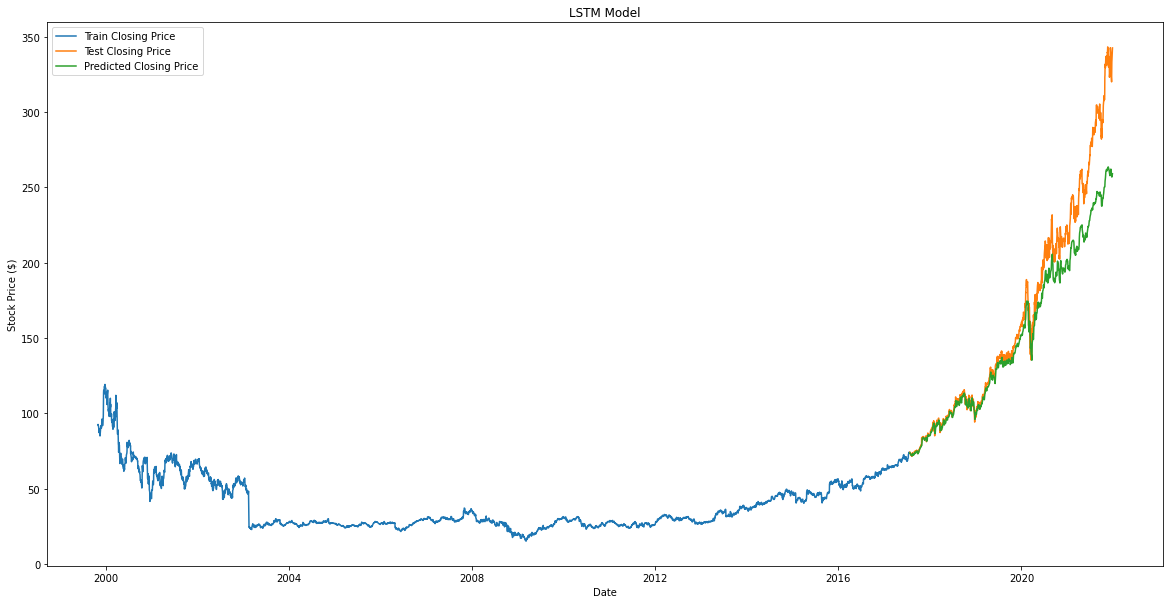

In [20]:

### Plot prediction and true trends and log to Neptune         
def plot_stock_trend_lstm(train, test, logNeptune=True):        
    fig = plt.figure(figsize = (20,10))
    plt.plot(train['Date'], train['Close'], label = 'Train Closing Price')
    plt.plot(test['Date'], test['Close'], label = 'Test Closing Price')
    plt.plot(test['Date'], test['Predictions_lstm'], label = 'Predicted Closing Price')
    plt.title('LSTM Model')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend(loc="upper left")
    
## Log image to Neptune new version
    if logNeptune:
        npt_exp['Plot of Stock Predictions with LSTM'].upload(neptune.types.File.as_image(fig))  
        
plot_stock_trend_lstm(train, test)

In [21]:
### Stop the run after logging for new version 
npt_exp.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 1 operations to synchronize with Neptune. Do not kill this process.


All 1 operations synced, thanks for waiting!
